In [59]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
#steps to use Estimator API
#1. Define a list of feature columns
#2. Create the Estimator Model
#3. Create a Data Input function
#4. Call train, evaluate and predict methods on the estimator object.

In [5]:
#1. Creating feature column!
features= [tf.feature_column.numeric_column('feat',shape=[1])]

In [9]:
estimator = tf.estimator.LinearRegressor(features)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\Lenovo\\AppData\\Local\\Temp\\tmpvucri2ge', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x00000038FE873CF8>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [11]:
data = np.linspace(0.0,10.0,1000000)
noise = np.random.randn(len(data))
y_exp = (0.5 * data) + 5 + noise

In [60]:
feature = pd.DataFrame(data,columns=['feature'])

In [61]:
label = pd.DataFrame(y_exp,columns=['Label'])

In [62]:
dataset = pd.concat([feature,label],axis=1)

In [13]:
from sklearn.model_selection import train_test_split
X_train ,X_test,Y_train,Y_test = train_test_split(data,y_exp,test_size=0.35,random_state=10)

In [14]:
print(X_train.shape)

(650000,)


In [15]:
print(X_test.shape)

(350000,)


In [17]:
#Input fuction kind acts like feed dict and batch sie indicator.

In [30]:
inp_fun = tf.estimator.inputs.numpy_input_fn({'feat':X_train},
                                             Y_train,
                                             batch_size=10,
                                            num_epochs=None,
                                            shuffle=True)

In [31]:
train_fun = tf.estimator.inputs.numpy_input_fn({'feat':X_train},
                                             Y_train,
                                             batch_size=10,
                                            num_epochs=1000,
                                            shuffle=False)

In [32]:
test_fun = tf.estimator.inputs.numpy_input_fn({'feat':X_test},
                                             Y_test,
                                             batch_size=10,
                                            num_epochs=1000,
                                            shuffle=False)

In [33]:
estimator.train(input_fn=inp_fun,steps=1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\Lenovo\AppData\Local\Temp\tmpvucri2ge\model.ckpt-19500
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 19500 into C:\Users\Lenovo\AppData\Local\Temp\tmpvucri2ge\model.ckpt.
INFO:tensorflow:loss = 11.52339, step = 19501
INFO:tensorflow:global_step/sec: 598.131
INFO:tensorflow:loss = 19.512796, step = 19601 (0.167 sec)
INFO:tensorflow:global_step/sec: 965.717
INFO:tensorflow:loss = 5.6665125, step = 19701 (0.104 sec)
INFO:tensorflow:global_step/sec: 635.205
INFO:tensorflow:loss = 14.670874, step = 19801 (0.161 sec)
INFO:tensorflow:global_step/sec: 657.785
INFO:tensorflow:loss = 1.8705102, step = 19901 (0.148 sec)
INFO:tensorflow:global_step/sec: 705.802
INFO:tensorflow:loss = 10.189279, step = 20001 (0.146 sec)
IN

In [36]:
train_matrix = estimator.evaluate(input_fn=train_fun,steps=1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2020-03-19T13:11:40Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\Lenovo\AppData\Local\Temp\tmpvucri2ge\model.ckpt-20500
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [100/1000]
INFO:tensorflow:Evaluation [200/1000]
INFO:tensorflow:Evaluation [300/1000]
INFO:tensorflow:Evaluation [400/1000]
INFO:tensorflow:Evaluation [500/1000]
INFO:tensorflow:Evaluation [600/1000]
INFO:tensorflow:Evaluation [700/1000]
INFO:tensorflow:Evaluation [800/1000]
INFO:tensorflow:Evaluation [900/1000]
INFO:tensorflow:Evaluation [1000/1000]
INFO:tensorflow:Finished evaluation at 2020-03-19-13:11:43
INFO:tensorflow:Saving dict for global step 20500: average_loss = 0.9936719, global_step = 20500, label/mean = 7.49835, loss = 9.936719, prediction/mean = 7.5365376
INFO:tensorflow:Saving 'checkpoint_p

In [37]:
train_matrix

{'average_loss': 0.9936719,
 'label/mean': 7.49835,
 'loss': 9.936719,
 'prediction/mean': 7.5365376,
 'global_step': 20500}

In [38]:
test_matrix = estimator.evaluate(input_fn=test_fun,steps=1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2020-03-19T13:12:31Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\Lenovo\AppData\Local\Temp\tmpvucri2ge\model.ckpt-20500
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [100/1000]
INFO:tensorflow:Evaluation [200/1000]
INFO:tensorflow:Evaluation [300/1000]
INFO:tensorflow:Evaluation [400/1000]
INFO:tensorflow:Evaluation [500/1000]
INFO:tensorflow:Evaluation [600/1000]
INFO:tensorflow:Evaluation [700/1000]
INFO:tensorflow:Evaluation [800/1000]
INFO:tensorflow:Evaluation [900/1000]
INFO:tensorflow:Evaluation [1000/1000]
INFO:tensorflow:Finished evaluation at 2020-03-19-13:12:33
INFO:tensorflow:Saving dict for global step 20500: average_loss = 1.0011401, global_step = 20500, label/mean = 7.478076, loss = 10.011401, prediction/mean = 7.523672
INFO:tensorflow:Saving 'checkpoint_

In [40]:
print('train_matrix',train_matrix)
print()
print('test_matrix',test_matrix)

train_matrix {'average_loss': 0.9936719, 'label/mean': 7.49835, 'loss': 9.936719, 'prediction/mean': 7.5365376, 'global_step': 20500}

test_matrix {'average_loss': 1.0011401, 'label/mean': 7.478076, 'loss': 10.011401, 'prediction/mean': 7.523672, 'global_step': 20500}


In [50]:
test_data = np.linspace(0,10,10)
predicting = tf.estimator.inputs.numpy_input_fn({'feat':test_data},
                                              shuffle=False)

In [55]:
predicted = list(estimator.predict(input_fn=predicting) )

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\Lenovo\AppData\Local\Temp\tmpvucri2ge\model.ckpt-20500
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


In [56]:
pred = []
for p in predicted:
    pred.append(p['predictions'])

In [57]:
pred

[array([5.005893], dtype=float32),
 array([5.565994], dtype=float32),
 array([6.126094], dtype=float32),
 array([6.6861944], dtype=float32),
 array([7.246295], dtype=float32),
 array([7.8063946], dtype=float32),
 array([8.366495], dtype=float32),
 array([8.926596], dtype=float32),
 array([9.486696], dtype=float32),
 array([10.046797], dtype=float32)]

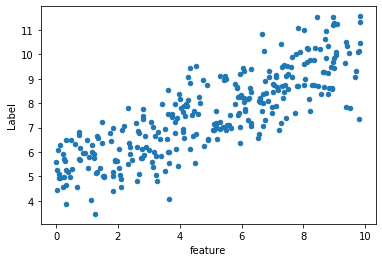

In [65]:
dataset.sample(n=300).plot(x='feature',y='Label',kind='scatter')

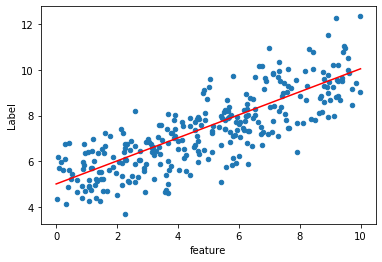

In [68]:
dataset.sample(n=300).plot(x='feature',y='Label',kind='scatter')
plt.plot(test_data,pred,'r')